In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys
sys.path.append('../common')

In [3]:
# define global variables
test_size = 0.2
random_state = 42

In [4]:
# Read the dataset
dataset = pd.read_csv('../Data/data.csv')
dataset.head(10)

,Id,Length,Width,Type
0,1,21.353462,17.489515,0
1,2,19.777907,20.954282,0
2,3,21.959486,22.399416,0
3,4,16.237031,17.155274,0
4,5,21.547234,23.214418,0
5,6,16.651716,15.504583,0
6,7,23.233582,19.005026,0
7,8,21.018607,23.798118,0
8,9,20.893276,19.365433,0
9,10,19.054253,19.517992,0


In [5]:
# We will not use Id as part of classification
dataset = dataset.drop(['Id'], axis = 1)
dataset.head(10)

,Length,Width,Type
0,21.353462,17.489515,0
1,19.777907,20.954282,0
2,21.959486,22.399416,0
3,16.237031,17.155274,0
4,21.547234,23.214418,0
5,16.651716,15.504583,0
6,23.233582,19.005026,0
7,21.018607,23.798118,0
8,20.893276,19.365433,0
9,19.054253,19.517992,0


In [6]:
# Create matrix X and Y as numpy arrays 
# if we dont use .values, it will remain a dataframe
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, -1].values

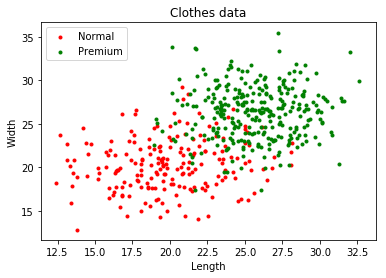

In [7]:
# Visualize the data
plt.scatter(x = X[Y == 0, 0], y = X[Y == 0, 1], color = 'red', marker = '.', label = 'Normal')
plt.scatter(x = X[Y == 1, 0], y = X[Y == 1, 1], color = 'green', marker = '.', label='Premium')
plt.title("Clothes data")
plt.xlabel("Length")
plt.ylabel("Width")
plt.legend()
plt.show()

In [8]:
# Split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = test_size, random_state = random_state)

In [50]:
# Fit the kNN regression
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
# Create the confusion matrix
from commonfunctions import print_classification_results
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)

Confusion Matrix:
 [[136  22]
 [ 11 231]]
Accuracy score: 0.9175
Classification Report:
              precision    recall  f1-score   support

          0       0.93      0.86      0.89       158
          1       0.91      0.95      0.93       242

avg / total       0.92      0.92      0.92       400



In [12]:
# Predict the test results
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[33  9]
 [ 5 53]]
Accuracy score: 0.86
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.79      0.82        42
          1       0.85      0.91      0.88        58

avg / total       0.86      0.86      0.86       100



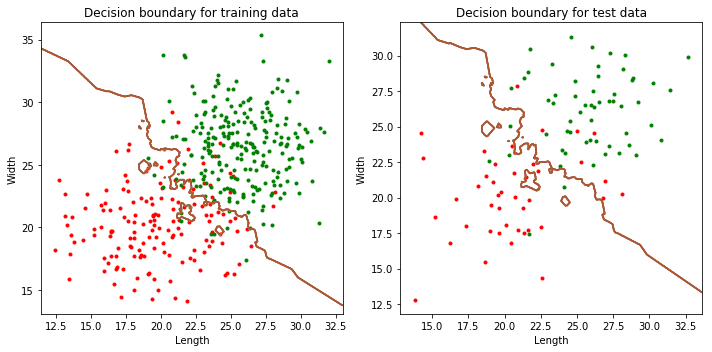

In [13]:
from commonfunctions import plot_classification_summary
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

In [14]:
# Perform the same operations with feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
# No reason to fit for test, because we want to use the same fit we used for training for the test as well
X_test = scaler_X.transform(X_test)
# Classification
classifier.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [15]:
# Training fit
Y_train_pred = classifier.predict(X_train)
print_classification_results(Y_train, Y_train_pred)

Confusion Matrix:
 [[137  21]
 [ 11 231]]
Accuracy score: 0.92
Classification Report:
              precision    recall  f1-score   support

          0       0.93      0.87      0.90       158
          1       0.92      0.95      0.94       242

avg / total       0.92      0.92      0.92       400



In [16]:
# Testing fit 
Y_pred = classifier.predict(X_test)
print_classification_results(Y_test, Y_pred)

Confusion Matrix:
 [[33  9]
 [ 5 53]]
Accuracy score: 0.86
Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.79      0.82        42
          1       0.85      0.91      0.88        58

avg / total       0.86      0.86      0.86       100



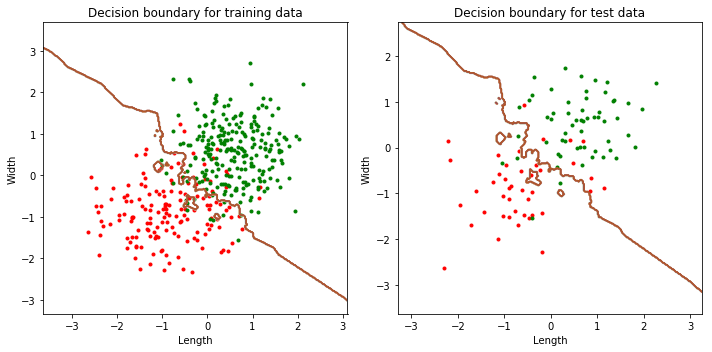

In [17]:
plot_classification_summary(X_train, Y_train, X_test, Y_test, classifier, plt)

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import math
neighbours = range(3, (int)(math.sqrt(X_train.shape[0]) * 1.2))

results = []
for k in neighbours:
    result = []
    result.append(k)
    
    # Train the classifier    
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, Y_train)
    Y_train_pred = classifier.predict(X_train)
    
    # Predict the values
    Y_pred = classifier.predict(X_test)
    
    # Append the results for training
    result.append(accuracy_score(Y_train, Y_train_pred))
    result.append(precision_score(Y_train, Y_train_pred))
    result.append(recall_score(Y_train, Y_train_pred))
    result.append(f1_score(Y_train, Y_train_pred))
    
    # Append the results for testing 
    result.append(accuracy_score(Y_test, Y_pred))
    result.append(precision_score(Y_test, Y_pred))
    result.append(recall_score(Y_test, Y_pred))
    result.append(f1_score(Y_test, Y_pred))
    
    results.append(result)


In [52]:
headers=['k', 'Accuracy', 'Precision','Recall','F1 score' 
                                , 'Accuracy', 'Precision','Recall','F1 score']

# Print top header
print('{:>5}'.format(' '),'Training data'.center(60, ' '),'Test data'.center(60, ' '))
for index, data in enumerate(headers):
    if (index == 0):
        print('{:>5}'.format(data), end="")
    else:
        print('{:>15}'.format(data), end="")
print()

for result in results:
    for index, data in enumerate(result):
        if (index == 0):
            print(format(data, '5d'), end="")
        else:
            print(format(data, '15.2%'), end="")
    print()

                             Training data                                                  Test data                          
    k       Accuracy      Precision         Recall       F1 score       Accuracy      Precision         Recall       F1 score
    3         92.50%         92.74%         95.04%         93.88%         84.00%         85.00%         87.93%         86.44%
    4         90.75%         94.76%         89.67%         92.14%         84.00%         86.21%         86.21%         86.21%
    5         92.00%         91.67%         95.45%         93.52%         86.00%         85.48%         91.38%         88.33%
    6         91.50%         94.07%         91.74%         92.89%         87.00%         86.89%         91.38%         89.08%
    7         91.75%         92.65%         93.80%         93.22%         87.00%         86.89%         91.38%         89.08%
    8         91.25%         93.31%         92.15%         92.72%         87.00%         86.89%         91.38%      